In [28]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [30]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [31]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [32]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [33]:
# Scale the data
scaled_data = scaler.fit_transform(df_market_data)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns,
    index=df_market_data.index
)

# Display the scaled DataFrame
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [34]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [35]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=1)
    
    # 2. Fit the model to the data using scaled_df
    model.fit(scaled_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)


c:\Users\Flore\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Flore\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Flore\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Flore\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

In [36]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

In [37]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

elbow_df.hvplot.line(x="k", y="inertia", title="Elbow Curve for Optimal k")


:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [38]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=1)

In [39]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(scaled_df)

c:\Users\Flore\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [40]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predictions = kmeans_model.predict(scaled_df)

# Print the resulting array of cluster values.
print(predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [41]:
# Create a copy of the scaled DataFrame
clustered_scaled_df = scaled_df.copy()

In [42]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
clustered_scaled_df["Cluster"] = predictions

# Display the copy of the scaled DataFrame
clustered_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [43]:
# Create a scatter plot using hvPlot by setting
clustered_scaled_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Crypto Clusters Using Scaled Data"
)


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [44]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [45]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(scaled_df)

# View the scaled PCA data
pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [46]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 1.00 (or 100%).

In [47]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(
    pca_data,
    columns=["PC1", "PC2", "PC3"],
    index=scaled_df.index
)

# Display the scaled PCA DataFrame
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [48]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [49]:
# Create an empty list to store the inertia values
pca_inertia = []

for k in k_values:
    # 1. Create a KMeans model using the loop counter for n_clusters
    model = KMeans(n_clusters=k, random_state=1)
    
    # 2. Fit the model to the data using pca_df
    model.fit(pca_df)
    
    # 3. Append the model.inertia_ to the list
    pca_inertia.append(model.inertia_)


c:\Users\Flore\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Flore\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Flore\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Flore\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

In [50]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {"k": k_values, "inertia": pca_inertia}


# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow_data)

In [51]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
pca_elbow_df.hvplot.line(x="k", y="inertia", title="PCA Elbow Curve")

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [52]:
# Initialize the K-Means model using the best value for k
kmeans_pca_model = KMeans(n_clusters=4, random_state=1)

In [53]:
# Fit the K-Means model using the PCA data
kmeans_pca_model.fit(pca_df)

c:\Users\Flore\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [54]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_predictions = kmeans_pca_model.predict(pca_df)

# Print the resulting array of cluster values.
print(pca_predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [55]:
# Create a copy of the scaled PCA DataFrame
pca_clustered_df = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_clustered_df["Cluster"] = pca_predictions

# Display the copy of the scaled PCA DataFrame
pca_clustered_df.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [56]:
# Create a scatter plot using hvPlot by setting
pca_clustered_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Crypto Clusters Using PCA Data"
)

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

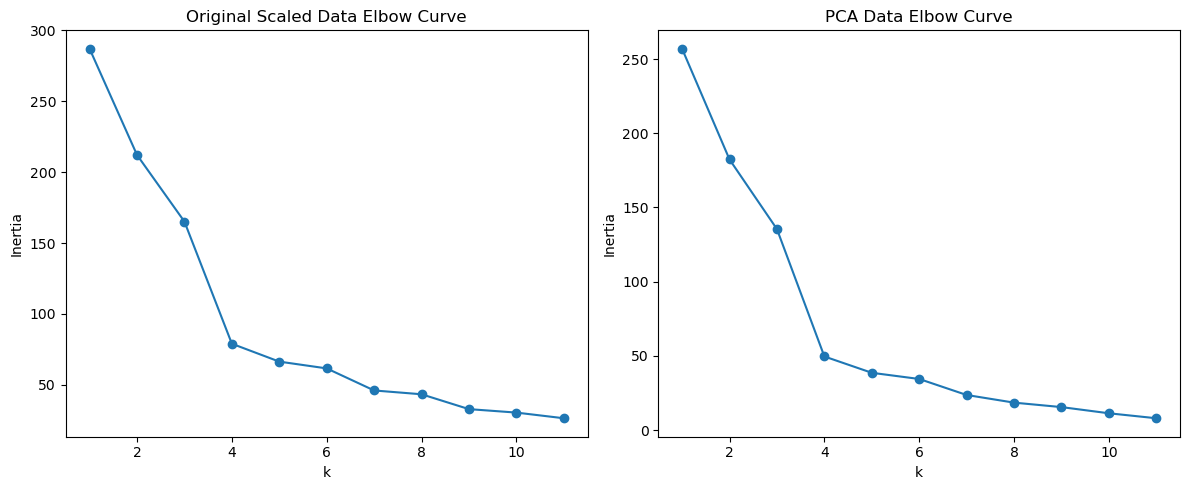

In [61]:
# Composite plot to contrast the Elbow curves

import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Original Scaled Data Elbow Curve')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Inertia')

ax[1].plot(k_values, pca_inertia, marker='o')
ax[1].set_title('PCA Data Elbow Curve')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Inertia')

plt.tight_layout()
plt.show()

# YOUR CODE HERE!

In [62]:
# Composite plot to contrast the clusters
scaled_plot = clustered_scaled_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Clusters using Original Scaled Data"
)

pca_plot = pca_clustered_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Clusters using PCA Data"
)
scaled_plot + pca_plot

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features simplifies the clustering, making the model faster and easier to visualize. It may lose some small details from the original data, which could affect the accuracy of the clusters slightly.